# QF600 Assignment 3

###### Prepared By:
Gabriel Woon

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

# Import Data

In [2]:
data_ind_raw = pd.read_excel('Industry_Portfolios.xlsx')
data_ind = data_ind_raw.drop("Date", axis = 1)
data_mkt_raw = pd.read_excel('Market_Portfolio.xlsx')
data_mkt = data_mkt_raw.drop("Date", axis = 1)
data_risk_raw = pd.read_excel('Risk_Factors.xlsx')
data_risk = data_risk_raw.drop("Date", axis = 1)

# Excess Returns

In [3]:
# create risk-free dataframe
Rf = data_risk["Rf"].copy()

In [4]:
# calculate excess return against risk-free
excess_rf = pd.DataFrame(data_ind.subtract(Rf, axis=0), 
                         columns = data_ind.columns)

In [5]:
# calculate excess return against target
excess_target = pd.DataFrame(data_ind.subtract(Rf, axis=0), 
                             columns = data_ind.columns)

# Sharpe Ratio

In [6]:
# calculate sharpe ratio
sharpe_ratio = excess_rf.mean()/excess_rf.std()
sharpe_ratio_table = pd.DataFrame(sharpe_ratio).T.rename(index={0: 'Sharpe Ratio'}); sharpe_ratio_table

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Sharpe Ratio,0.231099,0.072356,0.166616,0.181708,0.118552,0.169064,0.191753,0.172529,0.210948,0.064693


Text(0.5, 1.0, 'Sharpe Ratio')

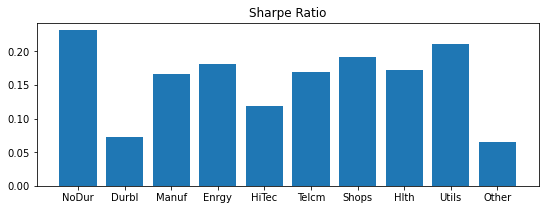

In [7]:
# plot sharpe ratio
plt.figure(figsize = (9, 3))
plt.bar(range(len(sharpe_ratio)), sharpe_ratio, tick_label=data_ind.columns)
plt.title("Sharpe Ratio")

# Sortino Ratio

In [8]:
# calculate semi-variance
semi_variance = excess_target.copy()
semi_variance[semi_variance > 0] = 0;
semi_variance = semi_variance**2

In [9]:
# calculate sortino ratio
sortino_ratio = excess_target.mean()/semi_variance.mean()**0.5
sortino_ratio_table = pd.DataFrame(sortino_ratio).T.rename(index={0: 'Sortino Ratio'}); sortino_ratio_table

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Sortino Ratio,0.350804,0.111967,0.24126,0.273612,0.17062,0.24494,0.293032,0.270294,0.290044,0.087351


Text(0.5, 1.0, 'Sortino Ratio')

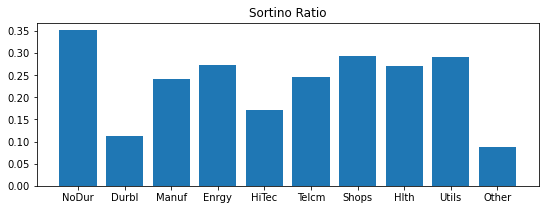

In [10]:
# plot sortino ratio
plt.figure(figsize = (9, 3))
plt.bar(range(len(sortino_ratio)), sortino_ratio, tick_label=data_ind.columns)
plt.title("Sortino Ratio")

# Treynor Ratio

In [11]:
# market model regression
MM = LinearRegression().fit(data_risk[["Rm-Rf"]], excess_rf)
MM_alpha = MM.intercept_
MM_beta = MM.coef_

In [12]:
# beta
MM_beta = pd.DataFrame(MM_beta.reshape(1,10), index = ['Slope (β)'], columns = data_ind.columns); MM_beta

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Slope (β),0.653744,1.649374,1.167929,0.965527,1.132387,0.901721,0.829515,0.67589,0.537009,1.206992


In [13]:
# calculate treynor ratio
treynor_ratio = excess_rf.mean()/MM_beta
treynor_ratio_table = pd.DataFrame(treynor_ratio).rename(index={"Slope (β)": 'Treynor Ratio'}); treynor_ratio_table

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Treynor Ratio,1.186372,0.367463,0.758251,1.14333,0.564295,0.836363,0.951258,0.971435,1.452334,0.299781


Text(0.5, 1.0, 'Treynor Ratio')

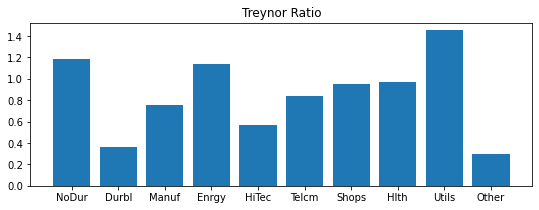

In [14]:
# plot treynor ratio
plt.figure(figsize = (9, 3))
plt.bar(range(len(treynor_ratio.iloc[0])), treynor_ratio.iloc[0], tick_label=data_ind.columns)
plt.title("Treynor Ratio")

# Jenson's Alpha

In [15]:
# calculate jenson's alpha
jensens_alpha = pd.DataFrame(MM_alpha.reshape(1,10), index = ['Jensens Alpha'],
                                       columns = data_ind.columns)
jensens_alpha

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Jensens Alpha,0.369717,-0.417903,0.160494,0.504485,-0.064024,0.194348,0.274093,0.236968,0.446523,-0.387508


Text(0.5, 1.0, 'Jensens Alpha')

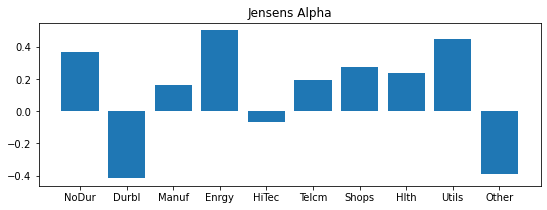

In [16]:
# plot jensen's alpha
plt.figure(figsize = (9, 3))
plt.bar(range(len(MM_alpha)), MM_alpha, tick_label=data_ind.columns)
plt.title("Jensens Alpha")

# Three-Factor Alpha

In [17]:
# three-factor regression
risk_factors = data_risk[['Rm-Rf','SMB','HML']]
TFM = LinearRegression().fit(risk_factors, excess_rf)
TFM_beta = TFM.coef_
TFM_alpha = TFM.intercept_

In [18]:
# calculate three-factor alpha
three_factor_alpha = pd.DataFrame(TFM_alpha.reshape(1,10), index = ['Three-Factor Alpha'],
                                       columns = data_ind.columns)
three_factor_alpha

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Three-Factor Alpha,0.386704,-0.474342,0.153285,0.523007,-0.065979,0.200724,0.255941,0.257472,0.474411,-0.404412


Text(0.5, 1.0, 'Three-Factor Alpha')

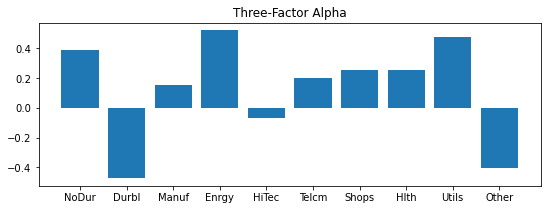

In [19]:
# plot three-factor alpha
plt.figure(figsize = (9, 3))
plt.bar(range(len(TFM_alpha)), TFM_alpha, tick_label=data_ind.columns)
plt.title("Three-Factor Alpha")